In [1]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as osp 
import json
from tqdm import tqdm
import random

%cd ..
from datasets.bases import read_image
from utils.metrics import *
from analyse import *
import umap
from matplotlib.patches import Patch

/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID


In [43]:
print("Loading data!")
output_dir = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/outputs/downloaded_models/msmt_msmt"
feature_type = "og" #"og"#"tent2"
distmat = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
pids = torch.load(osp.join(output_dir, "pids.pth"))
camids = torch.load(osp.join(output_dir, "camids.pth"))
with open(osp.join(output_dir, "imgpaths.json"), 'r') as f:
    file_content = f.read()  # Read the entire content of the file as a string
    imgpaths = json.loads(file_content) 
#p = pids
#pids = distmat
#distmat = p
#p = camids
#camids = pids
#pids = p
qf, gf = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
indices = np.argsort(distmat, axis=1)


# feature_type = "tent2"
# distmat2 = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
# qf2, gf2 = torch.load(osp.join(output_dir, f"qf_{feature_type}.pth")), torch.load(osp.join(output_dir, f"gf_{feature_type}.pth"))
# indices2 = np.argsort(distmat2, axis=1)
print("Loaded successfully!")


from collections import Counter


qbins, gbins = {}, {}
qpids, gpids = {}, {}
for i in range(qf.shape[0]):
    if camids[i] in qbins: 
        qbins[camids[i]].append(qf[i].unsqueeze(0))
        qpids[camids[i]].append(pids[i])
    else: 
        qbins[camids[i]] = [qf[i].unsqueeze(0)]
        qpids[camids[i]] = [pids[i]]

for i in range(gf.shape[0]):
    if camids[qf.shape[0] + i] in gbins: 
        gbins[camids[qf.shape[0] + i]].append(gf[i].unsqueeze(0))
        gpids[camids[qf.shape[0] + i]].append(pids[qf.shape[0] + i])
    else: 
        gbins[camids[qf.shape[0] + i]] = [gf[i].unsqueeze(0)]
        gpids[camids[qf.shape[0] + i]] = [pids[qf.shape[0] + i]]

q_norms, g_norms = {}, {}
for k,v in qbins.items():
    q_norms[k] = [torch.cat(v, dim=0).mean(dim=0), torch.cat(v, dim=0).std(dim=0)]
for k,v in gbins.items():
    g_norms[k] = [torch.cat(v, dim=0).mean(dim=0), torch.cat(v, dim=0).std(dim=0)]

print(q_norms.keys(), g_norms.keys())

for k,v in q_norms.items():
    IDS = qpids[k]
    frequency_dict = Counter(IDS)
    frequency_dict = dict(frequency_dict)
    print(k, len(qbins[k]), frequency_dict)
    print(v[0])
    print(v[1])
    

Loading data!


/tmp/ipykernel_2238298/1251042152.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  distmat = torch.load(osp.join(output_dir, f"distmat_{feature_type}.pth"))
/tmp/ipykerne

Loaded successfully!
dict_keys([0, 13, 6, 14, 4, 2, 11, 3, 5, 7, 10, 12, 8, 9, 1]) dict_keys([0, 4, 13, 6, 14, 2, 3, 8, 11, 10, 12, 7, 5, 9, 1])
0 1882 {0: 2, 2: 4, 5: 2, 7: 3, 10: 4, 11: 3, 12: 1, 16: 2, 17: 2, 21: 2, 22: 2, 23: 1, 26: 2, 29: 2, 32: 2, 33: 2, 34: 1, 37: 2, 42: 4, 43: 2, 44: 4, 45: 2, 49: 2, 51: 2, 53: 2, 55: 4, 56: 2, 61: 2, 63: 1, 64: 1, 66: 4, 67: 2, 69: 4, 71: 2, 75: 2, 80: 4, 81: 1, 82: 2, 83: 4, 87: 1, 88: 2, 89: 2, 92: 2, 93: 2, 94: 1, 95: 2, 99: 2, 101: 2, 103: 1, 104: 1, 105: 2, 107: 2, 109: 3, 110: 3, 113: 2, 114: 2, 115: 2, 116: 4, 117: 3, 124: 3, 127: 2, 128: 4, 129: 4, 135: 2, 136: 1, 139: 2, 140: 4, 142: 2, 145: 1, 146: 2, 148: 4, 151: 2, 153: 2, 154: 2, 156: 2, 157: 2, 159: 1, 161: 2, 165: 2, 168: 4, 170: 4, 174: 2, 175: 1, 178: 2, 180: 2, 183: 1, 185: 2, 188: 2, 191: 4, 192: 2, 199: 3, 202: 1, 207: 1, 208: 2, 210: 1, 211: 2, 213: 2, 217: 2, 218: 4, 219: 1, 221: 1, 222: 1, 223: 2, 224: 3, 225: 2, 226: 2, 227: 2, 228: 2, 233: 2, 234: 2, 235: 1, 236: 4, 23

In [44]:
print(qf.shape, gf.shape)
print(distmat.shape)
print(indices.shape)
print(indices[0])
print(distmat[0][indices[0]])

def compute_entropy(Q, G, k=100):
    cosine_distmat = cosine_similarity(Q.cuda(), G.cuda(), return_tensor=True)

    Q, G = Q.detach().cpu(), G.detach().cpu()
    cosine_indices = torch.argsort(cosine_distmat.detach().cpu(), dim=1)
    if k is not None:
        cosine_indices = cosine_indices[:, :k]
    cosine_distmat = cosine_distmat.detach().cpu().gather(1, cosine_indices)
    del cosine_indices
    cosine_distmat = F.softmax(cosine_distmat, dim=1)
    entropy = -torch.sum(cosine_distmat * torch.log(cosine_distmat), dim=1)
    return entropy.detach().cpu(), cosine_distmat

cd, cos_distmat = compute_entropy(qf, gf, k=None)
print(cd[0])
print(cd[0].min(), cd[0].max())
print(cd[0].argmin())
print(pids[0], pids[qf.shape[0] + cd[0].argmin()])

torch.Size([11659, 1280]) torch.Size([82161, 1280])
(11659, 82161)
(11659, 82161)
[   24    14    23 ... 21564 23878 21999]
[ 38.75868   40.429558  47.01343  ... 445.68607  446.95557  464.38284 ]
tensor(11.3146)
tensor(11.3146) tensor(11.3146)
tensor(0)
0 0


Bin 0 errors: 69 / 1593
Bin 1 errors: 12 / 4168
Bin 2 errors: 18 / 2946
Bin 3 errors: 36 / 1522
Bin 4 errors: 86 / 745
Bin 5 errors: 100 / 389
Bin 6 errors: 118 / 208
Bin 7 errors: 56 / 73
Bin 8 errors: 10 / 14
Bin 9 errors: 0 / 0
Total errors: 505 / 11658


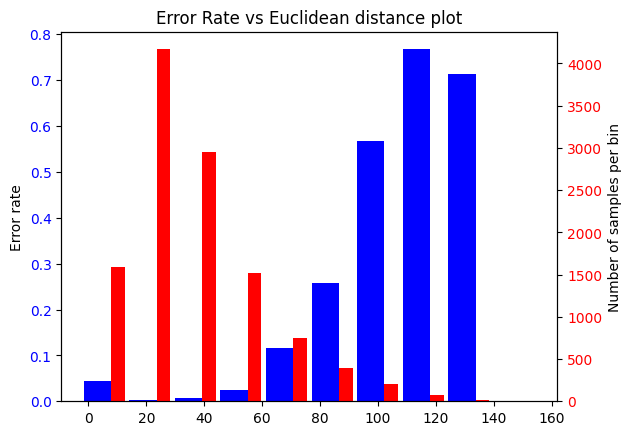

In [45]:
min_dists, prediction = [], []

for idx in range(qf.shape[0]):
    min_dists.append(distmat[idx][indices[idx]][0])
    #min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 10  # Adjust number of bins as needed
bins = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins) - 1

# Compute fraction of 0 values in each bin
fractions = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
ax1.bar(bin_centers-0.3*(bins[1] - bins[0]), fractions, width=(bins[1] - bins[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

ax2.bar(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, width=(bins[1] - bins[0]) * 0.3, align='center', color='red')
plt.xlabel('Euclidian distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Euclidean distance plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()


Bin 0 errors: 0 / 2
Bin 1 errors: 1 / 13
Bin 2 errors: 4 / 54
Bin 3 errors: 10 / 306
Bin 4 errors: 35 / 1059
Bin 5 errors: 99 / 2696
Bin 6 errors: 218 / 4329
Bin 7 errors: 114 / 2744
Bin 8 errors: 24 / 445
Bin 9 errors: 0 / 10
Total errors: 505 / 11658


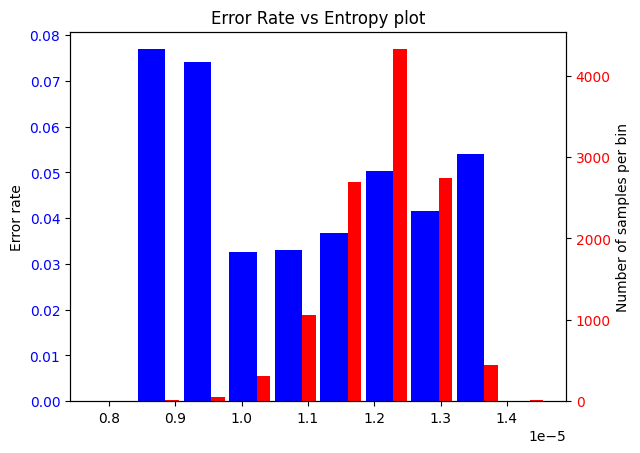

In [46]:
min_dists, prediction = [], []
cos_indices = indices #np.argsort(cos_distmat, axis=1)
for idx in range(qf.shape[0]):
    min_dists.append(cos_distmat[idx][cos_indices[idx]][0])
    #min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + cos_indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 10  # Adjust number of bins as needed
bins = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins) - 1

# Compute fraction of 0 values in each bin
fractions = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
ax1.bar(bin_centers-0.3*(bins[1] - bins[0]), fractions, width=(bins[1] - bins[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

ax2.bar(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, width=(bins[1] - bins[0]) * 0.3, align='center', color='red')
plt.xlabel('Euclidian distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Entropy plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()


0.57648075 1.0000004
Bin 0 errors: 11 / 15
Bin 1 errors: 56 / 85
Bin 2 errors: 121 / 344
Bin 3 errors: 118 / 854
Bin 4 errors: 73 / 2166
Bin 5 errors: 46 / 3806
Bin 6 errors: 43 / 2960
Bin 7 errors: 29 / 1160
Bin 8 errors: 7 / 243
Bin 9 errors: 1 / 25
Total errors: 505 / 11658


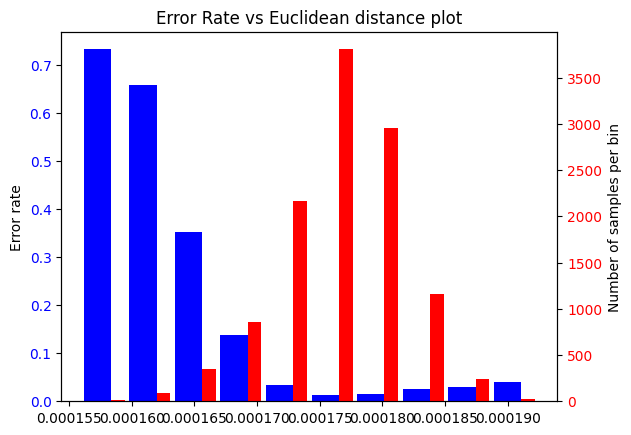

In [64]:
min_dists, prediction = [], []

temperature = 1000.0
soft_distmat = np.exp(-distmat / temperature)
print(soft_distmat.min(), soft_distmat.max())
soft_distmat = soft_distmat / soft_distmat.sum(axis=1, keepdims=True)
soft_distmat = - soft_distmat * np.log(soft_distmat)

for idx in range(qf.shape[0]):
    min_dists.append(soft_distmat[idx][indices[idx]][0])
    #min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 10  # Adjust number of bins as needed
bins = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins) - 1

# Compute fraction of 0 values in each bin
fractions = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
ax1.bar(bin_centers-0.3*(bins[1] - bins[0]), fractions, width=(bins[1] - bins[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

ax2.bar(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, width=(bins[1] - bins[0]) * 0.3, align='center', color='red')
plt.xlabel('Euclidian distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Euclidean distance plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()


# Trash

Bin 0 errors: 2 / 7
Bin 1 errors: 1 / 7
Bin 2 errors: 5 / 30
Bin 3 errors: 8 / 51
Bin 4 errors: 12 / 78
Bin 5 errors: 11 / 112
Bin 6 errors: 14 / 188
Bin 7 errors: 32 / 307
Bin 8 errors: 31 / 512
Bin 9 errors: 48 / 844
Bin 10 errors: 57 / 1173
Bin 11 errors: 64 / 1471
Bin 12 errors: 69 / 1762
Bin 13 errors: 59 / 1660
Bin 14 errors: 43 / 1424
Bin 15 errors: 28 / 1001
Bin 16 errors: 11 / 619
Bin 17 errors: 9 / 289
Bin 18 errors: 1 / 88
Bin 19 errors: 0 / 35
Total errors: 505 / 11658


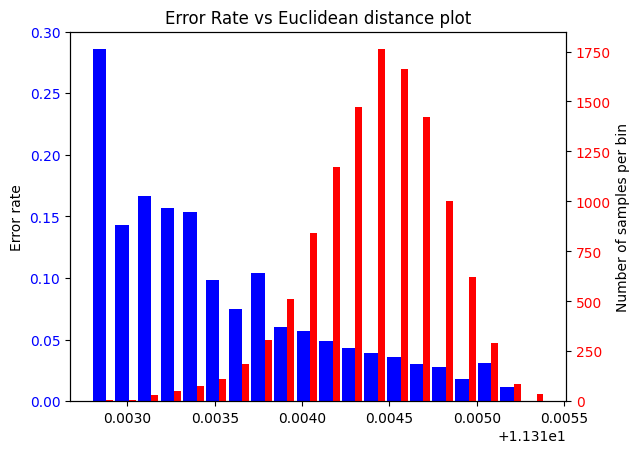

In [32]:
min_dists, prediction = [], []

for idx in range(qf.shape[0]):
    #min_dists.append(distmat[idx][indices[idx]][0])
    min_dists.append(cd[idx].item())
    prediction.append(1.0 if pids[idx] == pids[qf.shape[0] + indices[idx][0]] else 0.0)

min_dists = np.array(min_dists)
prediction = np.array(prediction)
min_dists = np.clip(min_dists, 0, min_dists.max()+100)

# Define bin edges for min_dists
num_bins = 20  # Adjust number of bins as needed
bins = np.linspace(min_dists.min(), min_dists.max(), num_bins + 1)

# Digitize min_dists into bins
bin_indices = np.digitize(min_dists, bins) - 1

# Compute fraction of 0 values in each bin
fractions = []
bin_counts = []
error_count, total_count = 0, 0
for i in range(num_bins):
    mask = bin_indices == i
    print(f'Bin {i} errors: {np.sum(prediction[mask] == 0)} / {np.sum(mask)}')
    error_count += np.sum(prediction[mask] == 0)
    total_count += np.sum(mask)
    bin_counts.append(np.sum(mask))
    if np.sum(mask) > 0:  # Avoid division by zero
        fraction_zeros = np.mean(prediction[mask] == 0)
    else:
        fraction_zeros = 0  # If no values in bin, set fraction to 0
    fractions.append(fraction_zeros)

print(f'Total errors: {error_count} / {total_count}')

# Compute bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

fig, ax1 = plt.subplots()

# Plot histogram
ax1.bar(bin_centers-0.3*(bins[1] - bins[0]), fractions, width=(bins[1] - bins[0]) * 0.6, align='center', color='blue')
ax2 = ax1.twinx()

ax2.bar(bin_centers+0.15*(bins[1] - bins[0]), bin_counts, width=(bins[1] - bins[0]) * 0.3, align='center', color='red')
plt.xlabel('Euclidian distance')
#plt.xlabel('Entropy')
ax1.set_ylabel('Error rate')
ax2.set_ylabel('Number of samples per bin')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Error Rate vs Euclidean distance plot')
#plt.title('Error Rate vs Entropy plot')
plt.show()

In [3]:
import json
import re
import ast

filepath = "/export/livia/home/vision/Rbhattacharya/work/reid_sandbox/CLIP-ReID/scripts/general_ablations.out"

with open(filepath, 'r') as f:
    lines = f.readlines()

dicts = []

for idx, line in enumerate(lines):
    if "TTA Args" in line:
        l = line[:-1]
        dict_str = re.search(r'\{.*\}', l).group()
        d = ast.literal_eval(dict_str)
        if idx+5 >= len(lines):
            break
        l_map, l_r1, l_r5, l_r10 = lines[idx+5][:-1], lines[idx+6][:-1], lines[idx+7][:-1], lines[idx+8][:-1]
        mAP = float(l_map.split(' ')[-1][:-1])
        R1 = float(l_r1.split(' ')[-1][1:-1])
        R5 = float(l_r5.split(' ')[-1][1:-1])
        R10 = float(l_r10.split(' ')[-1][1:-1])
        d['mAP'] = mAP
        d['R1'] = R1
        d['R5'] = R5
        d['R10'] = R10
        dicts.append(d)




    #break

# This is a string: Using TTA Args 1 or 576, Parameters: {'steps': 1, 'device': 'cuda', 'lr': 5e-05, 'topk': 1, 'temp': 100.0, 'episodic': False, 'lite': False, 'use_norm': True}
# how to extract the dictionary from the string?
# The string is in the format: Using TTA Args 1 or 576, Parameters: {'steps': 1, 'device': 'cuda', 'lr': 5e-05, 'topk': 1, 'temp': 100.0, 'episodic': False, 'lite': False, 'use_norm': True}


In [15]:
print(len(dicts))
count = 0
for d in dicts:
    if d['mAP'] < 2.0: 
        print(d)
        count+=1
print(count)

576
{'steps': 5, 'device': 'cuda', 'lr': 0.0001, 'topk': 1, 'temp': 600.0, 'episodic': False, 'lite': False, 'use_norm': True, 'mAP': 0.1, 'R1': 0.1, 'R5': 0.2, 'R10': 0.8}
{'steps': 5, 'device': 'cuda', 'lr': 0.0001, 'topk': 1, 'temp': 1000.0, 'episodic': False, 'lite': False, 'use_norm': True, 'mAP': 0.1, 'R1': 0.1, 'R5': 0.2, 'R10': 0.8}
{'steps': 5, 'device': 'cuda', 'lr': 0.0001, 'topk': 1, 'temp': 2000.0, 'episodic': False, 'lite': False, 'use_norm': True, 'mAP': 0.1, 'R1': 0.1, 'R5': 0.2, 'R10': 0.8}
{'steps': 5, 'device': 'cuda', 'lr': 0.0001, 'topk': 5, 'temp': 600.0, 'episodic': False, 'lite': False, 'use_norm': True, 'mAP': 0.1, 'R1': 0.1, 'R5': 0.2, 'R10': 0.8}
{'steps': 5, 'device': 'cuda', 'lr': 0.0001, 'topk': 5, 'temp': 1000.0, 'episodic': False, 'lite': False, 'use_norm': True, 'mAP': 0.1, 'R1': 0.1, 'R5': 0.2, 'R10': 0.8}
{'steps': 5, 'device': 'cuda', 'lr': 0.0001, 'topk': 5, 'temp': 2000.0, 'episodic': False, 'lite': False, 'use_norm': True, 'mAP': 0.1, 'R1': 0.1, '

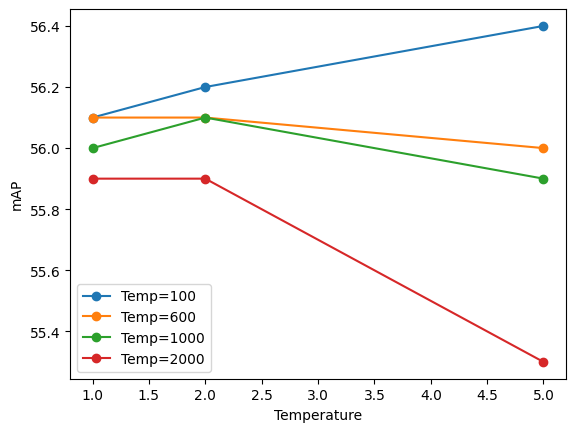

In [16]:
y_vals = ['mAP', 'R1', 'R5', 'R10']
x_vals = ['steps', 'lr', 'topk', 'temp']

constants = {"steps": 1, "lr": 5e-05, "topk": 1, "temp": 100.0}

def get_xy(dicts, x_vals, y_vals, x_choice, y_choice, constants):
    x, y = [], []
    for d in dicts:
        flag = True
        for k,v in d.items():
            if k not in list(constants.keys()):
                continue
            else:
                if k not in [x_choice, y_choice]:
                    if v != constants[k]:
                        flag = False
                        break
                    else:
                        continue
        
        if flag:
            x.append(d[x_choice])
            y.append(d[y_choice])
    
    return x, y

X, Y = get_xy(dicts, x_vals, y_vals, 'steps', 'mAP', {"steps": 1, "lr": 5e-05, "topk": 1, "temp": 100.0})
_, Y1 = get_xy(dicts, x_vals, y_vals, 'steps', 'mAP', {"steps": 1, "lr": 5e-05, "topk": 5, "temp": 600.0})
_, Y2 = get_xy(dicts, x_vals, y_vals, 'steps', 'mAP', {"steps": 1, "lr": 5e-05, "topk": 10, "temp": 1000.0})
_, Y3 = get_xy(dicts, x_vals, y_vals, 'steps', 'mAP', {"steps": 1, "lr": 5e-05, "topk": 50, "temp": 2000.0})



plt.plot(X, Y, marker='o', label="Temp=100")
plt.plot(X, Y1, marker='o', label="Temp=600")
plt.plot(X, Y2, marker='o', label="Temp=1000")
plt.plot(X, Y3, marker='o', label="Temp=2000")
plt.xlabel("Temperature")
plt.ylabel("mAP")
plt.legend()
plt.show()